In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt
from torch import nn

In [13]:
#network somewhat more concisely and clearly using the torch.nn.functional
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

#Exercise: Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [14]:

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [15]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0326, -0.0334, -0.0281,  ..., -0.0095, -0.0010,  0.0266],
        [ 0.0160,  0.0351, -0.0120,  ...,  0.0309,  0.0255, -0.0304],
        [-0.0064,  0.0197, -0.0149,  ...,  0.0010, -0.0341,  0.0264],
        ...,
        [-0.0301,  0.0219,  0.0004,  ...,  0.0305,  0.0246, -0.0007],
        [ 0.0007,  0.0061, -0.0180,  ..., -0.0101, -0.0002,  0.0330],
        [ 0.0211, -0.0298,  0.0264,  ..., -0.0075, -0.0168, -0.0333]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0333, -0.0161, -0.0312,  0.0148,  0.0183,  0.0133, -0.0194,  0.0241,
        -0.0205, -0.0193,  0.0213,  0.0072, -0.0257,  0.0296,  0.0339,  0.0165,
        -0.0320, -0.0323,  0.0135, -0.0315, -0.0138,  0.0224,  0.0097, -0.0036,
         0.0112,  0.0188,  0.0038,  0.0264, -0.0323, -0.0114,  0.0128, -0.0231,
        -0.0279, -0.0356,  0.0002, -0.0214,  0.0181, -0.0072,  0.0186,  0.0349,
        -0.0032, -0.0055,  0.0033, -0.0165, -0.0336, -0.0211, -0.0043,  0.0173,
         0.0180

In [16]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0078, -0.0060,  0.0175,  ...,  0.0057, -0.0086, -0.0088],
        [-0.0038, -0.0090,  0.0032,  ...,  0.0012,  0.0021,  0.0108],
        [ 0.0047, -0.0113,  0.0187,  ..., -0.0010, -0.0196,  0.0065],
        ...,
        [-0.0035,  0.0087,  0.0026,  ..., -0.0028, -0.0121,  0.0152],
        [ 0.0100,  0.0142,  0.0131,  ...,  0.0163,  0.0058,  0.0061],
        [ 0.0055, -0.0026, -0.0095,  ..., -0.0052, -0.0018,  0.0023]])

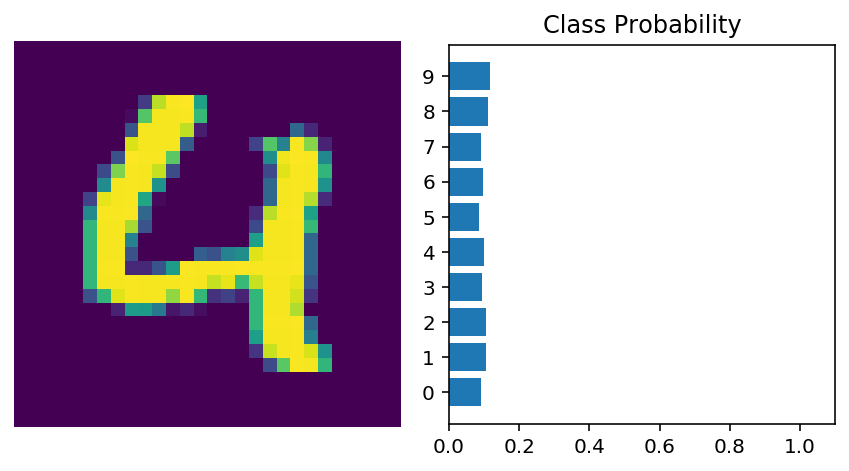

In [19]:

#when image is used
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


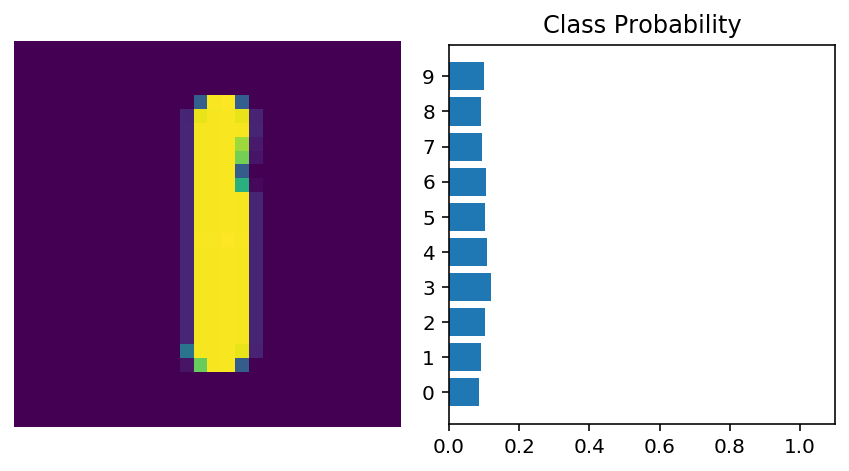

In [20]:
# tensor is passed sequentially through operations nn.Sequential
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [21]:
#To get first Linear operation and look at the weights
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0338,  0.0244,  0.0061,  ..., -0.0162,  0.0328,  0.0312],
        [ 0.0015, -0.0130,  0.0175,  ...,  0.0126,  0.0131, -0.0286],
        [-0.0107, -0.0285,  0.0030,  ..., -0.0211,  0.0270, -0.0075],
        ...,
        [ 0.0099, -0.0151,  0.0298,  ...,  0.0107, -0.0318,  0.0036],
        [-0.0261, -0.0190, -0.0146,  ..., -0.0324, -0.0312,  0.0272],
        [ 0.0158, -0.0029, -0.0019,  ...,  0.0272,  0.0249, -0.0030]],
       requires_grad=True)

In [23]:
#pass in an OrderedDict to name the individual layers and operations
#dictionary keys must be unique, so each operation must have a different name
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [24]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
